# ROAD MAP :

# 1.Data Understanding

Perusahaan properti online menawarkan penilaian rumah menggunakan ML. Tujuan adalah untuk memprediksi penjualan rumah di King County, Washington State, USA menggunakan Multiple Linear Regression (MLR). Dataset terdiri dari data historis rumah yang terjual antara Mei 2014 hingga Mei 2015. Saya akan memprediksi penjualan rumah di King County dengan akurasi setidaknya 75-80% dan memahami faktor mana yang bertanggung jawab atas nilai properti yang lebih tinggi - $650K ke atas.
Posisi saya sebagai konsultan yang berbicara ke stakeholders ?

# 2. Data Preparation

### a. Import package yg digunakan

In [1]:
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### b. Read Dataset yg digunakan 


In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


# 3. Data Wrangling

### a. Info dataset (nama kolom, jumlah kolom dan baris, dan tipenya)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Data terdiri dari 21 kolom dan 21613 baris, yang terdiri atas :
- id -> ID tiap ruamah yg terjual
- date -> Tangal penjualan
- price -> Harga tiap rumah
- bedrooms -> Jumlah kamar
- bathrooms -> NJumlah tiap kamar mandi, 0.5 artinya kamar dengan toilet tapi tidak ada shower
- sqft_living -> Square footage atau luas bangunan
- sqft_lot -> Luas lahan
- floors -> Jumlah lantai
- waterfront -> Rumah menghadap laut atau tidak (dummy variable)
- view -> Index dari 0 - 4 seberapa bagus viewnya
- condition -> Index kondisi bangunan skala 0 - 5
- grade -> Index konstruksi dan desain dari 1 - 13, dimana 1-3 kurang, 7 rata-rata, dan 11-13 berkualitas tinggi
- sqft_above -> Luas bangunan di atas tanah
- sqft_basement -> Di bawah tanah
- yr_built -> Tahun pembuatan
- yr_renovated -> Tahun renovasi
- zipcode -> Kode pos
- lat -> Lattitude(garis lintang)
- long -> Longitude(garis bujur)
- sqft_living15 -> Luas ruang tamu
- sqft_lot15 -> 

### b. Cek tipe data

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
datedt = df['date'].dt
df['yearsold'] = datedt.year ## ambil tahun 
df['monthsold'] = datedt.month ## ambil bulan
df['daysold'] = datedt.day ## ambil hari
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yearsold,monthsold,daysold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


### c. Cek NA

In [7]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
yearsold         0
monthsold        0
daysold          0
dtype: int64

Terdapat 2 NA di kolom sqft_above

### d. Handling Data pasca review (rapihkan huruf, eksekusi NA, ubah tipe data )

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
yearsold         0
monthsold        0
daysold          0
dtype: int64

In [10]:
# hapus kolom 
df.drop(['id'],axis=1)
# karena tidak diperlukan

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yearsold,monthsold,daysold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


In [11]:
# drop kolom date
df.drop(columns='date', inplace=True) 
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yearsold,monthsold,daysold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   price          21611 non-null  float64
 2   bedrooms       21611 non-null  int64  
 3   bathrooms      21611 non-null  float64
 4   sqft_living    21611 non-null  int64  
 5   sqft_lot       21611 non-null  int64  
 6   floors         21611 non-null  float64
 7   waterfront     21611 non-null  int64  
 8   view           21611 non-null  int64  
 9   condition      21611 non-null  int64  
 10  grade          21611 non-null  int64  
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21611 non-null  int64  
 13  yr_built       21611 non-null  int64  
 14  yr_renovated   21611 non-null  int64  
 15  zipcode        21611 non-null  int64  
 16  lat            21611 non-null  float64
 17  long           21611 non-null  float64
 18  sqft_l

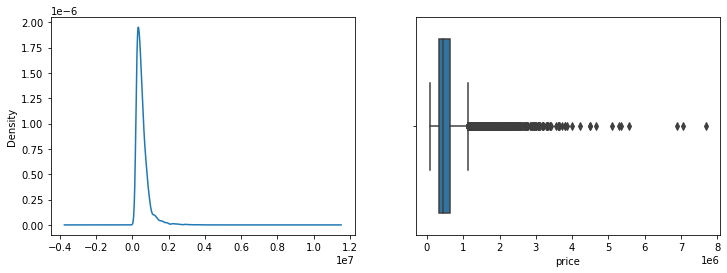

In [13]:
# analisis univariate persebaran price
# distribusi persebaran price
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['price'].plot(kind='kde')

f.add_subplot(1,2,2)
sns.boxplot(df['price'])
plt.show()

# 4. Cek Distribusinya

### a. Cek distribusi

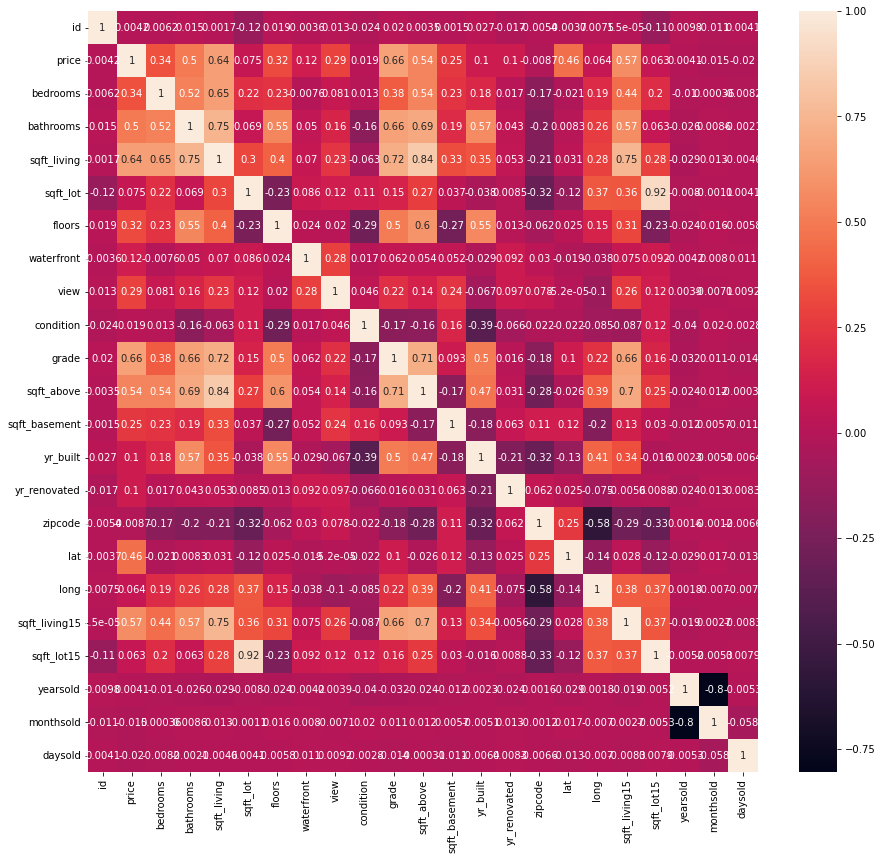

In [14]:
### Spearman
plt.figure(figsize=(15,14))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()
# untuk korelasi tidak normal

# 5. Machine Learning

### a. Splitting Data

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, median_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [16]:
X = df.drop(columns=['price'],axis=1)
y = df['price']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### b. Modelling

#### Linear Regression

In [18]:
Model = LinearRegression(fit_intercept=True)

In [19]:
Model.fit(X_train,y_train)

LinearRegression()

### Evaluation Metrics Calculation

In [20]:
pred_train = Model.predict(X_train)

In [21]:
pred_test = Model.predict(X_test)

In [22]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

#### Training Linear Regression

In [23]:
r2_train, MAE_train, MSE_train, RMSE_train = Eva_Matrix(Model, X_train, y_train)

#### Testing Linear Regression

In [24]:
r2_test, MAE_test, MSE_test, RMSE_test = Eva_Matrix(Model, X_test, y_test)

In [25]:
eva_LR = {
    'Training LinearReg' : [r2_train, MAE_train, MSE_train, RMSE_train],
    'Testing LinearReg' : [r2_test, MAE_test, MSE_test, RMSE_test]
}

pd.DataFrame(eva_LR, index=['R Squared', 'MAE', 'MSE', 'RMSE']).T

,R Squared,MAE,MSE,RMSE
Training LinearReg,0.701793,126703.055249,4.117746e+10,202922.291468
Testing LinearReg,0.699067,124621.184023,3.659529e+10,191298.962922


Nilai R Squared masih di bawah 0.7, perlu melakukan improvement untuk meningkatkan R Squared

# 6. ML Improvement (Polynomial) Feature Engineering

In [26]:
Poly = PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)

In [27]:
Poly = Poly.fit(X_train)

In [28]:
X_trainPoly = Poly.transform(X_train)
X_testPoly = Poly.transform(X_test)

In [29]:
df_XtrainPoly = pd.DataFrame(X_trainPoly)
df_XtestPoly = pd.DataFrame(X_testPoly)

### Training Model Polynomial Regression

In [30]:
Model_PF = LinearRegression()

In [31]:
Model_PF.fit(df_XtrainPoly, y_train)

LinearRegression()

In [32]:
PF_train = Model_PF.predict(df_XtrainPoly)
PF_test = Model_PF.predict(df_XtestPoly)

### Evaluation Metrics Polynomial

Training

In [33]:
r2_train_PF, MAE_train_PF, MSE_train_PF, RMSE_train_PF = Eva_Matrix(Model_PF, df_XtrainPoly, y_train)

Testing

In [34]:
r2_test_PF, MAE_test_PF, MSE_test_PF, RMSE_test_PF = Eva_Matrix(Model_PF, df_XtestPoly, y_test)

In [35]:
eva_LR_PF = {
    'Training LinearReg' : [r2_train, MAE_train, MSE_train, RMSE_train],
    'Testing LinearReg' : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Training LinearReg PF' : [r2_train_PF, MAE_train_PF, MSE_train_PF, RMSE_train_PF],
    'Testing LinearReg PF' : [r2_test_PF, MAE_test_PF, MSE_test_PF, RMSE_test_PF]
}

pd.DataFrame(eva_LR_PF, index=['R Squared', 'MAE', 'MSE', 'RMSE']).T

,R Squared,MAE,MSE,RMSE
Training LinearReg,0.701793,126703.055249,4.117746e+10,202922.291468
Testing LinearReg,0.699067,124621.184023,3.659529e+10,191298.962922
Training LinearReg PF,0.811651,104720.151737,2.600795e+10,161269.815392
Testing LinearReg PF,0.776251,107775.222835,2.720923e+10,164952.198705


Improvement yg dilakukan menggunakan polynomial features berhasil meningkatkan R Squared dari sebelumnya di bawah 0.7 menjadi 0.77.

# 7. ML Improvement Manual 

## Ridge

In [36]:
Model_R_PF = Ridge()

In [37]:
Model_R_PF.fit(df_XtrainPoly, y_train)

Ridge()

Training

In [38]:
r2_R_tr_PF, MAE_R_tr_PF, MSE_R_tr_PF, RMSE_R_tr_PF = Eva_Matrix(Model_R_PF, df_XtrainPoly, y_train)

Testing

In [39]:
r2_R_ts_PF, MAE_R_ts_PF, MSE_R_ts_PF, RMSE_R_ts_PF = Eva_Matrix(Model_R_PF, df_XtestPoly, y_test)

## Lasso

In [40]:
Model_L_PF = Lasso()

In [41]:
Model_L_PF.fit(df_XtrainPoly, y_train)

Lasso()

Training

In [42]:
r2_L_tr_PF, MAE_L_tr_PF, MSE_L_tr_PF, RMSE_L_tr_PF = Eva_Matrix(Model_L_PF, df_XtrainPoly, y_train)

Testing

In [43]:
r2_L_ts_PF, MAE_L_ts_PF, MSE_L_ts_PF, RMSE_L_ts_PF = Eva_Matrix(Model_L_PF, df_XtestPoly, y_test)

## ElasticNet

In [44]:
Model_E_PF = ElasticNet()

In [45]:
Model_E_PF.fit(df_XtrainPoly, y_train)

ElasticNet()

Training

In [46]:
r2_E_tr_PF, MAE_E_tr_PF, MSE_E_tr_PF, RMSE_E_tr_PF = Eva_Matrix(Model_E_PF, df_XtrainPoly, y_train)

Testing

In [47]:
r2_E_ts_PF, MAE_E_ts_PF, MSE_E_ts_PF, RMSE_E_ts_PF = Eva_Matrix(Model_E_PF, df_XtestPoly, y_test)

## Comparison

In [48]:
eva_matrix_Reg_PF = {
    'Poly LinearReg Training' : [r2_train_PF, MAE_train_PF, MSE_train_PF, RMSE_train_PF],
    'Poly LinearReg Testing' : [r2_test_PF, MAE_test_PF, MSE_test_PF, RMSE_test_PF],
    'Poly Ridge Training' : [r2_R_tr_PF, MAE_R_tr_PF, MSE_R_tr_PF, RMSE_R_tr_PF],
    'Poly Ridge Testing' : [r2_R_ts_PF, MAE_R_ts_PF, MSE_R_ts_PF, RMSE_R_ts_PF],
    'Poly Lasso Training' : [r2_L_tr_PF, MAE_L_tr_PF, MSE_L_tr_PF, RMSE_L_tr_PF],
    'Poly Lasso Testing' : [r2_L_ts_PF, MAE_L_ts_PF, MSE_L_ts_PF, RMSE_L_ts_PF],
    'Poly ElasticNet Training' : [r2_E_tr_PF, MAE_E_tr_PF, MSE_E_tr_PF, RMSE_E_tr_PF],
    'Poly ElasticNet Testing' : [r2_E_ts_PF, MAE_E_ts_PF, MSE_E_ts_PF, RMSE_E_ts_PF],
}

eva_matrix_Reg_PF = pd.DataFrame(eva_matrix_Reg_PF, index=['R2', 'MAE', 'MSE', 'RMSE']).T

eva_matrix_Reg_PF

,R2,MAE,MSE,RMSE
Poly LinearReg Training,0.811651,104720.151737,2.600795e+10,161269.815392
Poly LinearReg Testing,0.776251,107775.222835,2.720923e+10,164952.198705
Poly Ridge Training,0.819036,102634.219020,2.498810e+10,158076.241965
Poly Ridge Testing,0.785687,105094.159089,2.606187e+10,161436.882673
Poly Lasso Training,0.789734,109313.036601,2.903430e+10,170394.549324
Poly Lasso Testing,0.765307,109854.890809,2.854010e+10,168938.167422
Poly ElasticNet Training,0.788335,109702.608802,2.922741e+10,170960.269805
Poly ElasticNet Testing,0.764562,109907.100482,2.863070e+10,169206.099167


Polynomial Ridge memiliki nilai R Squared tertinggi sebesar 0.78.
Untuk meningkatkan nilai R Squared perlu melakukan tuning

# 8. Tuning

## Alpha

In [49]:
def Manual_Tune(Alpha, X_train, X_test, y_train, y_test, Model):
    train_r = []
    test_r = []

    for i in Alpha:
        model_R = Model(alpha=i)
        model_R.fit(X_train, y_train)
        y_pred_tr = model_R.predict(X_train)
        R2_train = r2_score(y_train,y_pred_tr)
        train_r.append(R2_train)
        y_pred_ts = model_R.predict(X_test)
        R2_test = r2_score(y_test, y_pred_ts)
        test_r.append(R2_test)

    return train_r, test_r

In [50]:
Alpha = np.arange(0,5,0.01)

### Ridge

In [51]:
train_Ridge, test_Ridge = Manual_Tune(Alpha, df_XtrainPoly, df_XtestPoly, y_train, y_test, Ridge)

In [52]:
Alpha[np.argmax(test_Ridge)]
# cari max test score -> 0.19

0.19

In [53]:
Model_R_PF_tng = Ridge(alpha=0.19)

In [54]:
Model_R_PF_tng.fit(df_XtrainPoly, y_train)

Ridge(alpha=0.19)

### Lasso

In [55]:
train_lasso, test_lasso = Manual_Tune(Alpha, df_XtrainPoly, df_XtestPoly, y_train, y_test, Lasso)

In [61]:
Alpha[np.argmax(test_lasso)]
# max test score -> 4.99

4.99

In [72]:
Model_L_PF_tng = Lasso(alpha=4.99)

In [73]:
Model_L_PF_tng.fit(df_XtrainPoly, y_train)

Lasso(alpha=4.99)

### ElasticNet

In [64]:
train_Enet, test_Enet = Manual_Tune(Alpha, df_XtrainPoly, df_XtestPoly, y_train, y_test, ElasticNet) 

In [65]:
Alpha[np.argmax(test_Enet)]
# max test score -> 0.02

0.02

In [67]:
Model_E_PF_tng = ElasticNet(alpha=0.02)

In [68]:
Model_E_PF_tng.fit(df_XtrainPoly, y_train)

ElasticNet(alpha=0.02)

## Evaluation Matrix Calculation Setelah Tuning

### Ridge

Training

In [69]:
r2_R_tr_PF_tng, MAE_R_tr_PF_tng, MSE_R_tr_PF_tng, RMSE_R_tr_PF_tng = Eva_Matrix(Model_R_PF_tng, df_XtrainPoly, y_train)

Testing

In [70]:
r2_R_ts_PF_tng, MAE_R_ts_PF_tng, MSE_R_ts_PF_tng, RMSE_R_ts_PF_tng = Eva_Matrix(Model_R_PF_tng, df_XtestPoly, y_test)

### Lasso

Training

In [74]:
r2_L_tr_PF_tng, MAE_L_tr_PF_tng, MSE_L_tr_PF_tng, RMSE_L_tr_PF_tng = Eva_Matrix(Model_L_PF_tng, df_XtrainPoly, y_train)

Testing

In [75]:
r2_L_ts_PF_tng, MAE_L_ts_PF_tng, MSE_L_ts_PF_tng, RMSE_L_ts_PF_tng = Eva_Matrix(Model_L_PF_tng, df_XtestPoly, y_test)

### ElasticNet

Training

In [76]:
r2_E_tr_PF_tng, MAE_E_tr_PF_tng, MSE_E_tr_PF_tng, RMSE_E_tr_PF_tng = Eva_Matrix(Model_E_PF_tng, df_XtrainPoly, y_train)

Testing

In [77]:
r2_E_ts_PF_tng, MAE_E_ts_PF_tng, MSE_E_ts_PF_tng, RMSE_E_ts_PF_tng = Eva_Matrix(Model_E_PF_tng, df_XtestPoly, y_test)

# 9. Final Evaluation Matrix

In [78]:
eva_matrix_Reg_PF_final = {
    'Poly LinearReg Training' : [r2_train_PF, MAE_train_PF, MSE_train_PF, RMSE_train_PF],
    'Poly LinearReg Testing' : [r2_test_PF, MAE_test_PF, MSE_test_PF, RMSE_test_PF],
    'Poly Ridge Tuned Training' : [r2_R_tr_PF_tng, MAE_R_tr_PF_tng, MSE_R_tr_PF_tng, RMSE_R_tr_PF_tng],
    'Poly Ridge Tuned Testing' : [r2_R_ts_PF_tng, MAE_R_ts_PF_tng, MSE_R_ts_PF_tng, RMSE_R_ts_PF_tng],
    'Poly Lasso Tuned Training' : [r2_L_tr_PF_tng, MAE_L_tr_PF_tng, MSE_L_tr_PF_tng, RMSE_L_tr_PF_tng],
    'Poly Lasso Tuned Testing' : [r2_L_ts_PF_tng, MAE_L_ts_PF_tng, MSE_L_ts_PF_tng, RMSE_L_ts_PF_tng],
    'Poly ElasticNet Tuned Training' : [r2_E_tr_PF_tng, MAE_E_tr_PF_tng, MSE_E_tr_PF_tng, RMSE_E_tr_PF_tng],
    'Poly ElasticNet Tuned Testing' : [r2_E_ts_PF_tng, MAE_E_ts_PF_tng, MSE_E_ts_PF_tng, RMSE_E_ts_PF_tng],
}

eva_matrix_final = pd.DataFrame(eva_matrix_Reg_PF_final, index=['R2', 'MAE', 'MSE', 'RMSE']).T

## Sebelum Tuning

In [79]:
eva_matrix_Reg_PF

,R2,MAE,MSE,RMSE
Poly LinearReg Training,0.811651,104720.151737,2.600795e+10,161269.815392
Poly LinearReg Testing,0.776251,107775.222835,2.720923e+10,164952.198705
Poly Ridge Training,0.819036,102634.219020,2.498810e+10,158076.241965
Poly Ridge Testing,0.785687,105094.159089,2.606187e+10,161436.882673
Poly Lasso Training,0.789734,109313.036601,2.903430e+10,170394.549324
Poly Lasso Testing,0.765307,109854.890809,2.854010e+10,168938.167422
Poly ElasticNet Training,0.788335,109702.608802,2.922741e+10,170960.269805
Poly ElasticNet Testing,0.764562,109907.100482,2.863070e+10,169206.099167


Nilai R2 terbesar ketika melakukan Ridge, yaitu 0.785687 dan yg terkecil ElasticNet sebesar 0.764562

## Sesudah Tuning

In [80]:
eva_matrix_final

,R2,MAE,MSE,RMSE
Poly LinearReg Training,0.811651,104720.151737,2.600795e+10,161269.815392
Poly LinearReg Testing,0.776251,107775.222835,2.720923e+10,164952.198705
Poly Ridge Tuned Training,0.821450,101380.545983,2.465479e+10,157018.452783
Poly Ridge Tuned Testing,0.789307,103995.593444,2.562162e+10,160067.561119
Poly Lasso Tuned Training,0.789734,109313.442548,2.903423e+10,170394.343021
Poly Lasso Tuned Testing,0.765347,109837.900409,2.853528e+10,168923.889827
Poly ElasticNet Tuned Training,0.789406,109386.003479,2.907955e+10,170527.267743
Poly ElasticNet Tuned Testing,0.765662,109795.887290,2.849696e+10,168810.440149


- Linear regression -> Tidak mengalami kenaikan
- Ridge --> sebelumnya 0.785687 setelah dituning 0.789307, mengalami kenaikan 0.00362
- Lasso --> sebelumnya 0.765307 setelah dituning 0.765347, mengalami kenaikan 0.00004
- ElasticNet --> sebelumnya 0.764562 setelah dituning 0.765662, mengalami kenaikan 0.892058

# 10. Kesimpulan

Model yang tepat untuk perusahaan gunakan adalah Ridge Testing Tuning, model ini memiliki skore 78% keakuratannya.